In [1]:
from mt_rent_statement import *

### Load data

In [2]:
start='2023-02-01'
end='2023-02-28'
dfT=load_tenancies('all_tenancies.xls')
dfAll=load_data(start,end)
dfAll.head(3)

WARNING *** file size (103480) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Reading file: E:\dtuklaptop\e\Users\Mat\python\data\property\checked\FEB2023_codedAndCategorised.xlsx


E:\dtuklaptop\e\Users\Mat\python\14. property\PropertyAnalytics_v2\mt_rent_statement.py:163: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dfAll=pd.concat([dfAll,dfTemp])


,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2023-02-01,20-74-09 60458872,5688.99,Funds Transfer,205397 30728691 SF FT,NaN,NaN,Funds3072,NaN
2023-02-01,20-53-97 30728691,-300.00,Direct Debit,HMRC NDDS 107381297971978564 DD,NaN,NaN,HMRCDD,NaN
2023-02-01,20-53-97 30728691,-299.16,Direct Debit,CHL HOME LOAN CHL00002/907372200FIR,F2169FAW,NaN,Mortgage,NaN


### Rent Statement

In [3]:
paidinadvancelist = ['Peter Gradon (28/02/2018)'] 
inarrearslist = ['Mark Williams (25/09/2019)']
dfRs=get_rent_statement(dfAll, dfT, start, end, inarrearslist, paidinadvancelist)
dfRs=dfRs.round(0)
#dfRs.sort_values(by=['Net'], ascending=False).style.apply(custom_style, axis=1)
#dfRs.sort_values(by=['Bills'], ascending=True).style.apply(custom_style, axis=1)
dfRs.style.apply(custom_style, axis=1)

,Tenant,Agent,Received,Bills,Mortgage,Net,Status
Property,,,,,,,
321 London Rd,,,0,0,0,0,
Flat 1 - 321 London Rd,Soumya Xaviour (19/12/2022),None,725,0,-374,351,Paid
Flat 2 - 321 London Rd,Cipran Georgescu (18/01/2020),None,625,-162,-360,103,Paid
Flat 3 - 321 London Rd,Charles Prescott (01/10/2022),None,900,0,-301,599,Paid
Flat 4 - 321 London Rd,Chloe Freshney & Harry Aldingtons (31/01/2023),None,1283,-303,-374,606,Paid
169 Fawcett Rd,,,0,-15,0,-15,
Flat 1 - 169 Fawcett Rd,Susan Parkinson (06/11/2016),Beals,507,0,-337,171,Paid
Flat 2 - 169 Fawcett Rd,Vaclav Hajek (10/08/2019),None,600,0,-299,301,Paid
Flat 3 - 169 Fawcett Rd,August John (14/05/2022),None,675,0,-362,313,Paid


This month:

- rate 3.5%

Notes:
- Valverde evicted 26/01/23, Radzevics 13/12/22, Hinks 10/02/23, Austin 03/04/23
- Mark Williams didn't pay Oct
- Graddon paid 6 months advance in Sept to March - Gradon was served S13 rent increase and paid the difference in Jan 23
- Ivana to check rent increases for:
    - Parkinson
    - Pedace
    - Passmore
    - Henson
- F1 171 rent raised to £875 on 06/03/23
- Plan to give S13 to Henson on 01/03/23
- ** Need to refund Fratton roof payment in Jan


### Income/Expenditure per Property

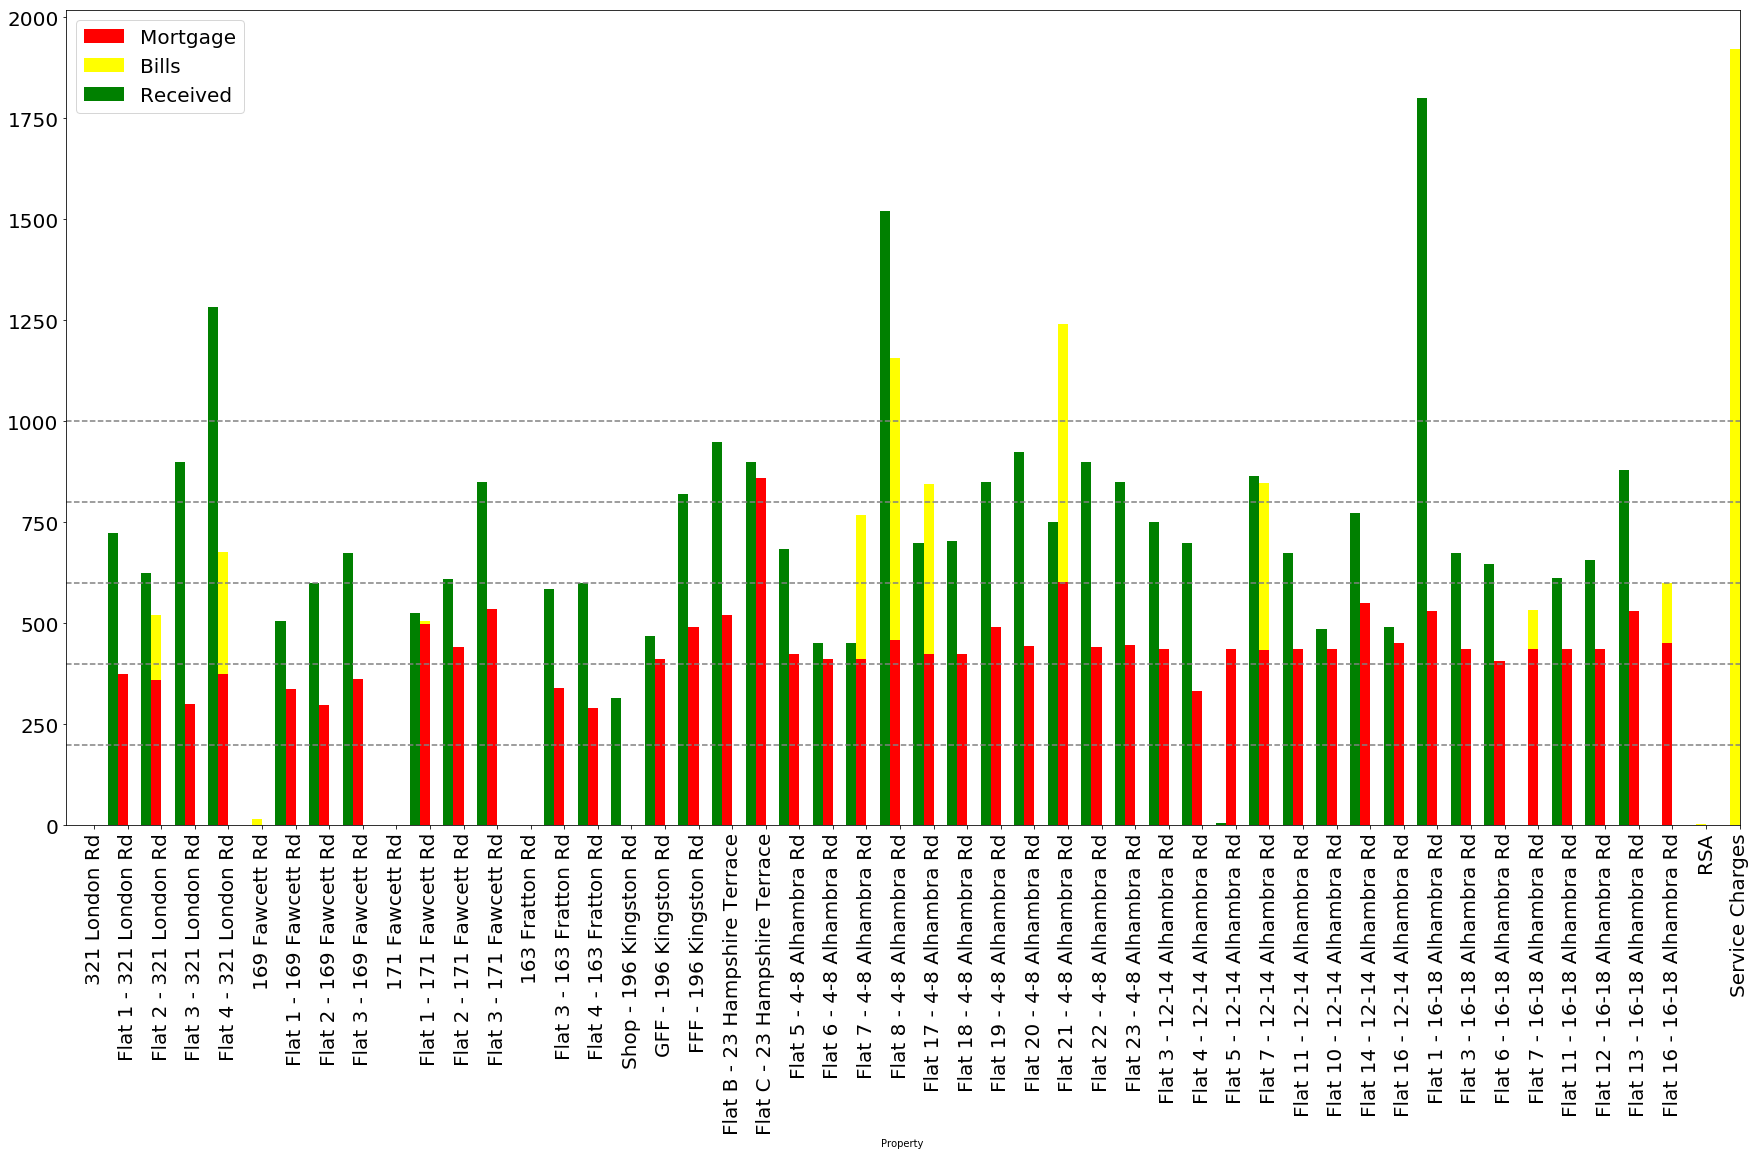

In [4]:
plot_income_expenditure_per_property(dfRs[:-1])

### Net Income Per Property

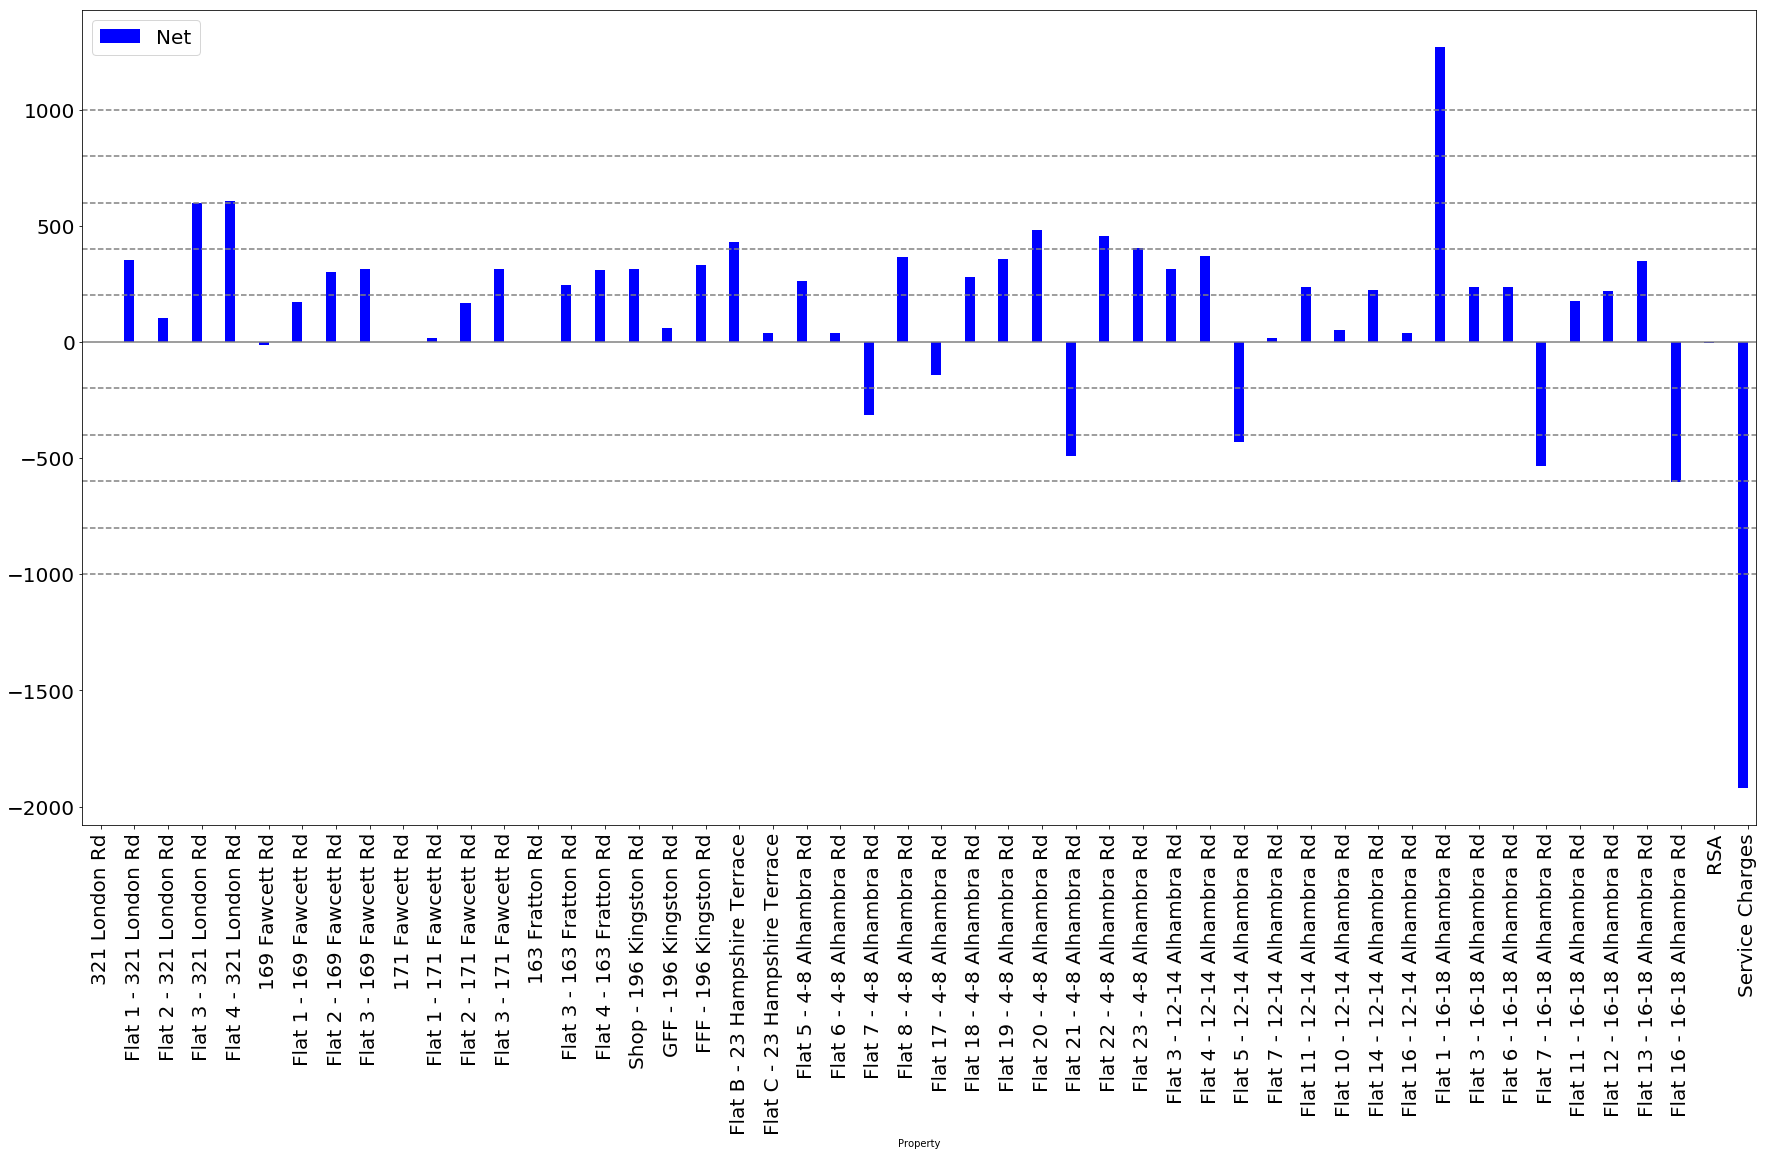

In [5]:
plot_net_income(dfRs[:-1])

### Accounts Check
Check Drawings against expenses

In [6]:
dfAll[(dfAll.Cat=='RegularPayment')|(dfAll.Cat=='PersonalExpense')|(dfAll.Cat=='Hilltop')|(dfAll.Cat=='HMRCDD')|(dfAll.Cat=='Drawings')|(dfAll.Cat=='SchoolFee')].groupby(['Cat']).sum()

,Amount
Cat,
Drawings,-1.00
HMRCDD,-600.00
Hilltop,-300.00
PersonalExpense,-2982.81
RegularPayment,-906.06
SchoolFee,-5684.78


In [7]:
dfAll.groupby(['Account','Cat']).sum().style.apply(custom_style_accounts_cat, axis=1)

#### Mortgage check
Check mortgages refunded from business account

In [8]:
dfMtg=dfAll[((dfAll.Cat=='Mortgage')|(dfAll.Cat=='MortgageRefund'))&(dfAll.Account!='60-83-71 00558156')].groupby(['Account','Cat']).Amount.sum()
dfMtg=dfMtg.reset_index().pivot('Account','Cat')
dfMtg.columns=dfMtg.columns.get_level_values(1)
if('MortgageRefund' not in dfMtg.columns):
    dfMtg['MortgageRefund']=0
dfMtg['Diff']=dfMtg.Mortgage + dfMtg.MortgageRefund
dfMtg

Cat,Mortgage,MortgageRefund,Diff
Account,,,
20-53-97 30728691,-14112.43,2294.39,-11818.04
20-74-09 60458872,-4853.32,4857.92,4.60


In [9]:
dfMtg['Diff'].sum()

-11813.440000000002

#### Rent check
Rents going to wrong account

In [10]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2023-02-01,20-74-09 60458872,900.0,Funds Transfer,FYLES GR RENT FT,F11618ALH,NaN,OurRent,NaN
2023-02-03,20-74-09 60458872,-900.0,Bill Payment,RSA CAPITAL LIMITE 1 16-18 FYLES RENT BB,F11618ALH,NaN,OurRent,NaN
2023-02-03,20-53-97 30728691,110.0,Counter Credit,F88ALHAMBRARD SEQUENCE UK LIMI BGC,F88ALH,NaN,OurRent,NaN
2023-02-03,20-53-97 30728691,-110.0,Bill Payment,RSA CAPITAL LIMITE 8 8 AGENT RENT BBP,F88ALH,NaN,OurRent,NaN
2023-02-28,20-53-97 30728691,-820.0,Bill Payment,RSA CAPITAL LIMITE MWILLIAMS 196BRENT BB,196BKIN,NaN,OurRent,NaN
2023-02-28,20-53-97 30728691,820.0,Counter Credit,M Williams RENT BGC,196BKIN,NaN,OurRent,NaN
2023-02-28,20-53-97 30728691,750.0,NaN,Rent for period 17/02/23-16/03/23 Mr Samuel Pa...,F2146ALH,NaN,OurRent,NaN


In [11]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='OurRent')].groupby(['Cat']).sum()

,Amount
Cat,
OurRent,750.0


#### Property expense check
Property expenses and service charges taken from 3072 or 6045

In [12]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat
2023-02-03,20-74-09 60458872,-15.0,Standing Order,SSE SOUTHERN ELECT 6882766014 STO,169FAW,NaN,PropertyExpense,NaN
2023-02-28,20-53-97 30728691,-640.0,NaN,Fox & Sons (£110 paid),F2146ALH,NaN,PropertyExpense,NaN


In [13]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='PropertyExpense')].groupby(['Cat']).sum()

,Amount
Cat,
PropertyExpense,-655.0


In [14]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')]

,Account,Amount,Subcategory,Memo,Property,Description,Cat,Subcat


In [15]:
dfAll.loc[(dfAll.Account!='60-83-71 00558156')&(dfAll.Cat=='ServiceCharge')].groupby(['Cat']).sum()

,Amount
Cat,
